[*********************100%%**********************]  1 of 1 completed


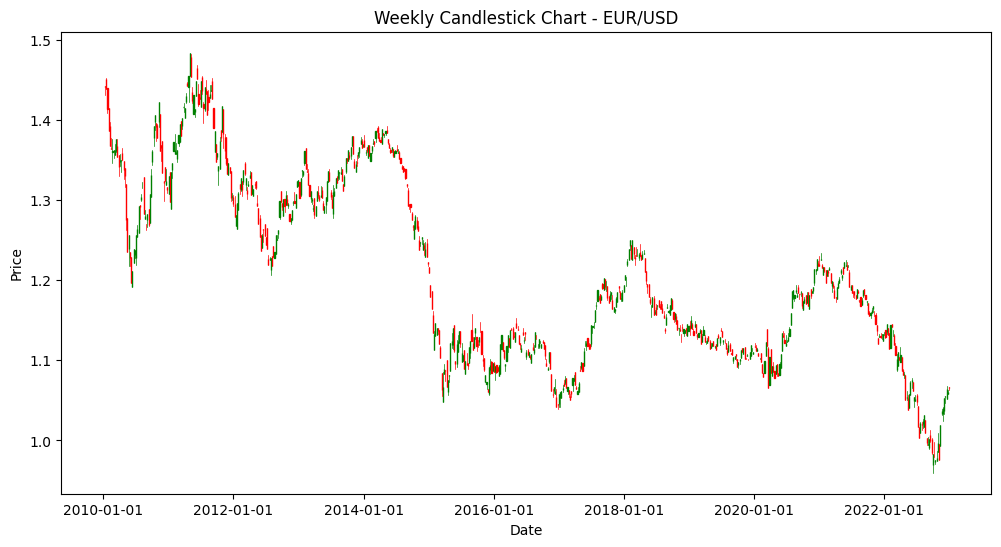

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Fetch historical data for EUR/USD from Yahoo Finance API
data = yf.download('EURUSD=X', start='2010-01-01', end='2022-12-31')

# Resample the data to weekly frequency and calculate OHLC (Open, High, Low, Close) prices
weekly_data = data['Close'].resample('W').ohlc()

# Reset index to convert dates to a column
weekly_data.reset_index(inplace=True)

# Convert date to a numerical format for plotting
weekly_data['Date'] = weekly_data['Date'].map(mdates.date2num)

# Plot candlestick chart
plt.figure(figsize=(12, 6))
ax = plt.subplot()
candlestick_ohlc(ax, weekly_data.values, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Candlestick Chart - EUR/USD')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Preprocess the data
data['Date'] = data.index
data.reset_index(drop=True, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(pd.Timestamp.to_julian_date)

# Split the data into features (X) and target variable (y)
X = data['Date'].values.reshape(-1, 1)
y = data['Close'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


22/22 [==============================] - 0s 900us/step


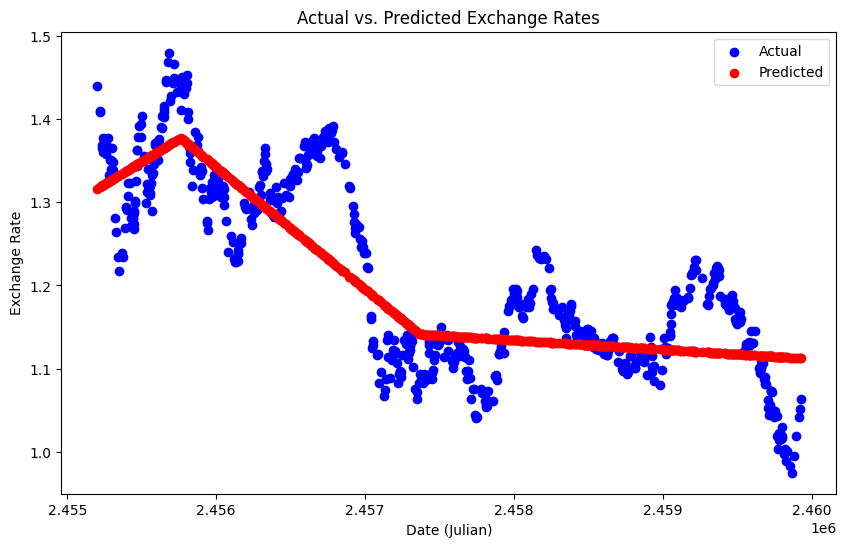

In [31]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Plot actual vs. predicted exchange rates
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Date (Julian)')
plt.ylabel('Exchange Rate')
plt.title('Actual vs. Predicted Exchange Rates')
plt.legend()
plt.show()


In [26]:
!pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from datetime import datetime, timedelta

# Fetch historical data for EUR/USD from Yahoo Finance API
data = yf.download('EURUSD=X', start='2010-01-01', end=datetime.now())

# Resample the data to weekly frequency and calculate OHLC (Open, High, Low, Close) prices
weekly_data = data.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})

# Drop rows with missing values
weekly_data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(weekly_data)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=weekly_data.columns, index=weekly_data.index)

# Split the data into features (X) and target variable (y)
X = scaled_df[['Open', 'High', 'Low']]
y = scaled_df['Close']

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Save the trained model
model.save('exchange_rate_prediction_model.h5')


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 44ms/step


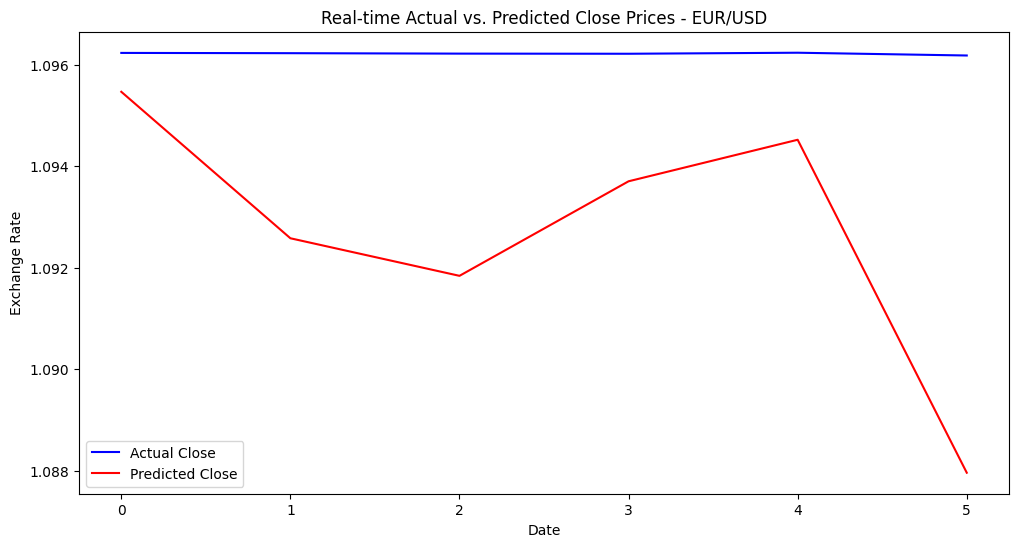

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 13ms/step


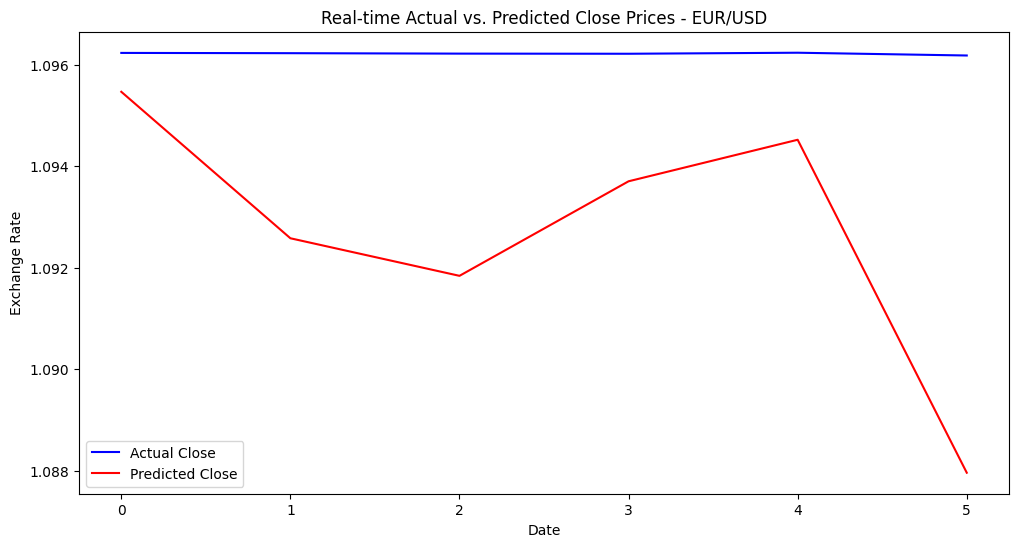

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 20ms/step


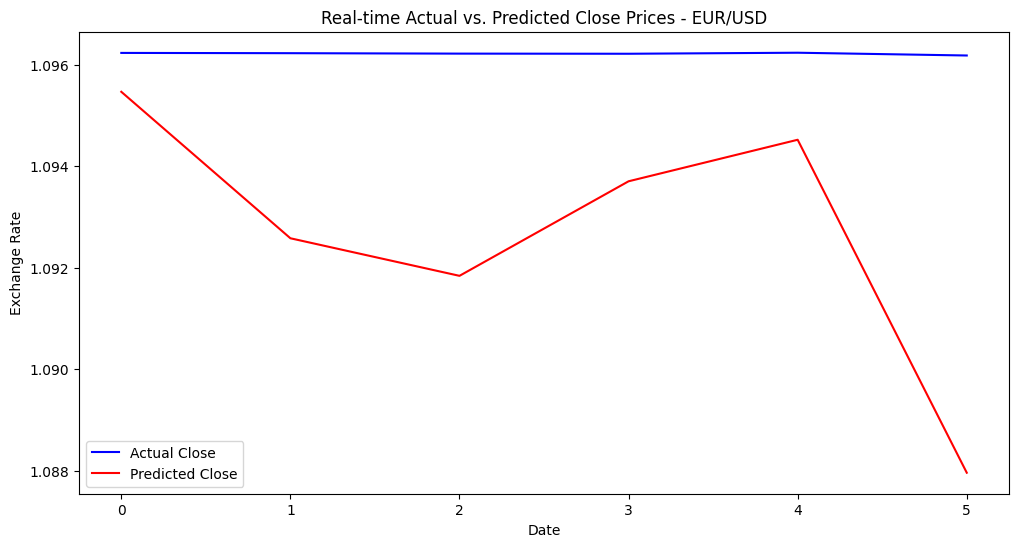

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 13ms/step


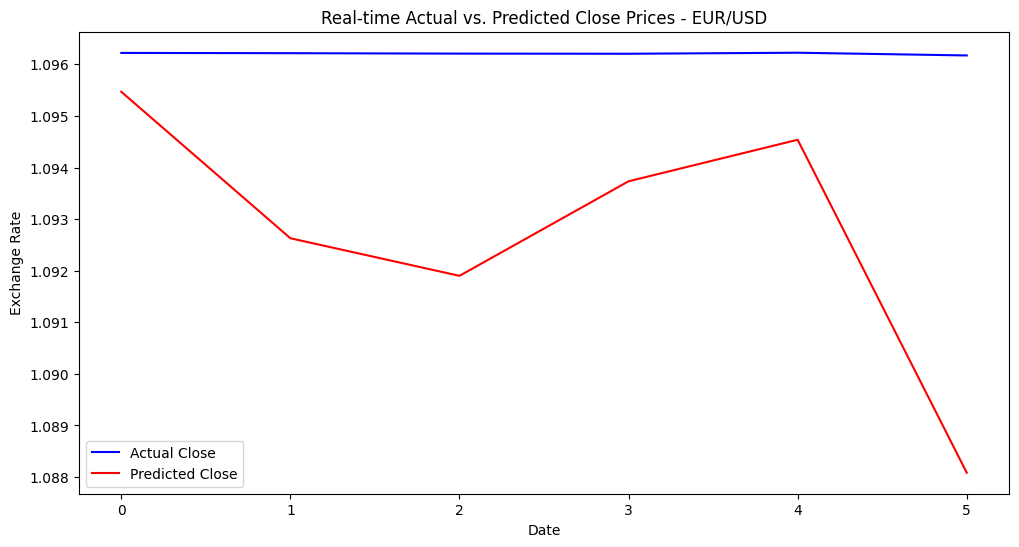

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 14ms/step


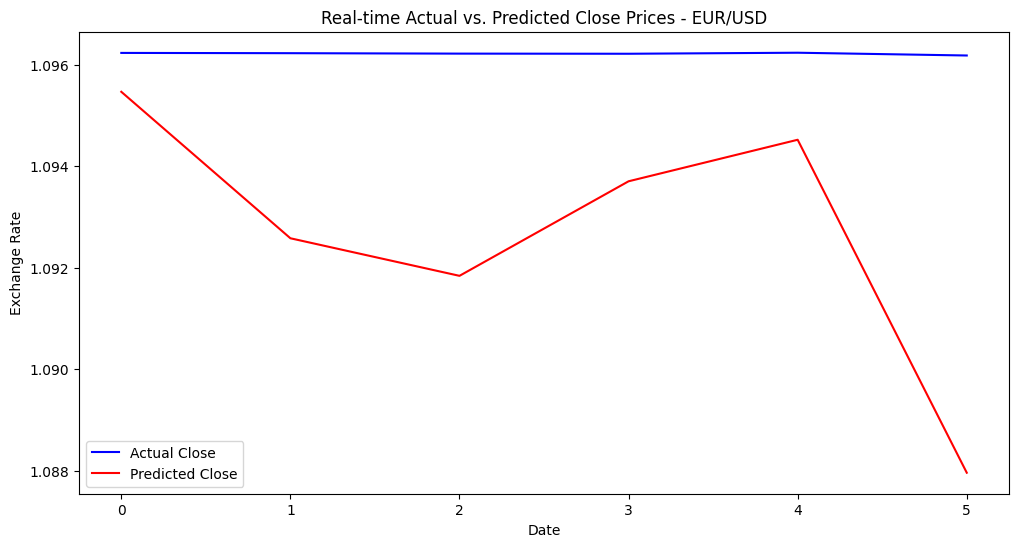

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 16ms/step


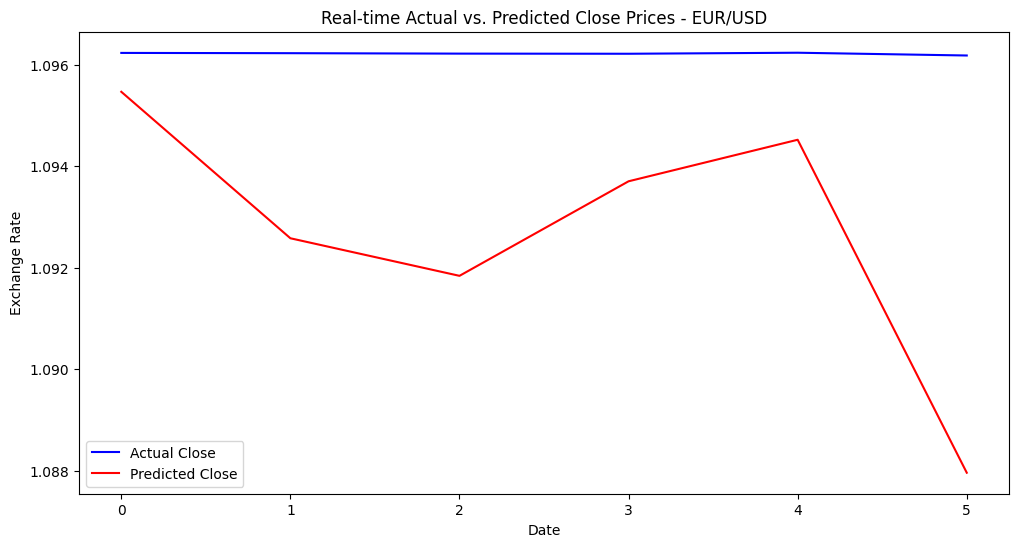

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 16ms/step


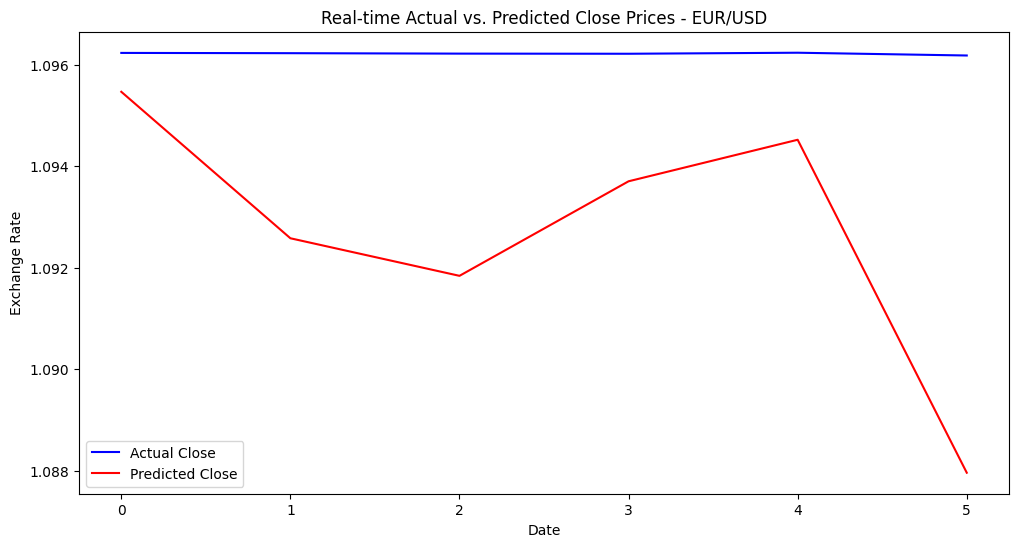

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 14ms/step


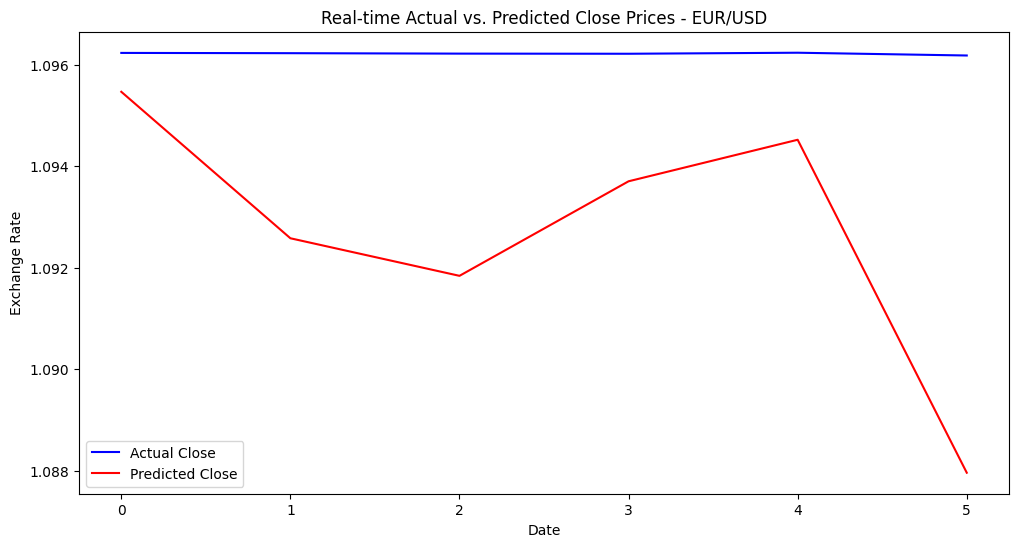

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import load_model
from datetime import datetime, timedelta
import time

# Load the pre-trained model
model = load_model('exchange_rate_prediction_model.h5')

# Define a function to fetch and preprocess the latest data
def fetch_and_preprocess_data():
    data = yf.download('EURUSD=X', start=datetime.now() - timedelta(days=7), end=datetime.now())
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].map(mdates.date2num)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close']])
    X = scaled_data[:, :-1]
    return X, data['Close'], scaler

# Define a function to make predictions
def make_predictions(X, model):
    predictions = model.predict(X)
    return predictions

# Define a function to update the visualization
def update_visualization(actual, predicted, scaler):
    actual_inv = scaler.inverse_transform(np.hstack((X, actual.values.reshape(-1, 1))))
    predicted_inv = scaler.inverse_transform(np.hstack((X, predicted)))
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual_inv[:, -1], label='Actual Close', color='blue')
    plt.plot(actual.index, predicted_inv[:, -1], label='Predicted Close', color='red')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.title('Real-time Actual vs. Predicted Close Prices - EUR/USD')
    plt.legend()
    plt.show()

# Main loop for real-time prediction
while True:
    X, actual, scaler = fetch_and_preprocess_data()
    predicted = make_predictions(X, model)
    update_visualization(actual, predicted, scaler)
    time.sleep(60)  # Fetch and update every minute
